## Deep Neural Network 

In [23]:
import os
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense


In [4]:
train_ds = pd.read_excel('/Users/pawankumarkc/Documents/vscode_workspace/MLAlgo/datasets/Loan_Application.xlsx')
train_ds.head()

,ID,Decision,Selfcon_Code,Tier_1,Tier_2,AccoClass,LoanType,Gender,Etype,Doc_pf,...,Term,Dwnpay,BankSave,CalcEmi,IIR,IAR,FOIR,LTV,LVR,dwnp_prop_p
0,1,0,1,0,0,0,1,0,1,0,...,84,300000,0,4087.159912,7.999922,11.000000,22.300176,40.000000,40.0,60.000000
1,2,0,1,0,0,0,1,0,0,1,...,180,130000,0,4924.810059,21.999509,38.999129,32.858975,71.000036,71.0,28.888889
2,3,1,1,0,0,0,0,0,1,1,...,84,557000,0,11712.969727,36.000030,56.000047,36.000030,17.999999,47.0,52.696310
3,4,1,1,0,0,1,1,0,1,1,...,180,666500,0,15390.040039,36.999736,52.999656,36.999736,56.000009,60.0,39.993999
4,5,1,1,0,0,0,1,0,1,1,...,180,151000,0,15390.040039,40.999654,57.000148,40.999654,51.000008,87.0,13.119027


In [5]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            1570 non-null   int64  
 1   Decision      1570 non-null   int64  
 2   Selfcon_Code  1570 non-null   int64  
 3   Tier_1        1570 non-null   int64  
 4   Tier_2        1570 non-null   int64  
 5   AccoClass     1570 non-null   int64  
 6   LoanType      1570 non-null   int64  
 7   Gender        1570 non-null   int64  
 8   Etype         1570 non-null   int64  
 9   Doc_pf        1570 non-null   int64  
 10  Marstat       1570 non-null   int64  
 11  Emp_Type_1    1570 non-null   int64  
 12  Emp_Type_2    1570 non-null   int64  
 13  Emp_Type_3    1570 non-null   int64  
 14  Educlass_2    1570 non-null   int64  
 15  Educlass_1    1570 non-null   int64  
 16  Oriclass_1    1570 non-null   int64  
 17  Oriclass_2    1570 non-null   int64  
 18  eom_25        1570 non-null 

In [7]:
train_ds.shape

(1570, 38)

In [6]:
# Setting dependent and independent variables

x = train_ds.iloc[:,2:]
y = train_ds.iloc[:,1] #Dependent variable - Decision 

x.head(2)

,Selfcon_Code,Tier_1,Tier_2,AccoClass,LoanType,Gender,Etype,Doc_pf,Marstat,Emp_Type_1,...,Term,Dwnpay,BankSave,CalcEmi,IIR,IAR,FOIR,LTV,LVR,dwnp_prop_p
0,1,0,0,0,1,0,1,0,1,1,...,84,300000,0,4087.159912,7.999922,11.000000,22.300176,40.000000,40.0,60.000000
1,1,0,0,0,1,0,0,1,1,0,...,180,130000,0,4924.810059,21.999509,38.999129,32.858975,71.000036,71.0,28.888889


In [11]:
num_inputs = x.shape[1]
print(f'Number of Independent variables is {num_inputs}')

Number of Independent variables is 36


In [12]:
y.value_counts()

1    1255
0     315
Name: Decision, dtype: int64

In [15]:
315/(1255+315)*100
# Test size is 20% train is 8-%, when randomly selected there are changes that train data can see only one type of data
# and this 20% of train data can completely get into test set, hence we apply stratify

20.063694267515924

In [13]:
# Split the dataset into train and test 
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

#Imbalanbed dataset, so stratified = y

## {{ IMP: Feature scaling is mandatory in DNN }}

outlier traeatment, imbalance data treatment not required in DNN

In [16]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)

#fit = apply 
#transform = change
# Approach for handling data leakage part
#Find the scaling value on training set and use the same on test set, so don't use fir_transform on test set
# Reason: 


In [17]:
pd.DataFrame(x_train).head(3)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.192768,-0.696156,-0.761495,-0.970189,0.277825,-0.305163,0.921835,-0.604332,0.328000,0.979509,...,0.533285,0.634178,-0.174014,-0.119952,-0.630528,-0.864033,-0.784048,-0.750035,-0.594775,0.849991
1,0.192768,-0.696156,1.313207,-0.970189,0.277825,-0.305163,-1.084793,1.654719,-3.048784,-1.020919,...,0.533285,-0.273340,-0.174014,-0.542250,0.965971,-0.491625,0.801671,0.524279,-0.027202,0.044289
2,0.192768,-0.696156,1.313207,-0.970189,0.277825,-0.305163,0.921835,-0.604332,0.328000,0.979509,...,0.533285,-0.211863,-0.174014,1.569233,0.590249,-0.165831,0.428486,0.831875,0.540370,-0.742947


In [18]:
pd.DataFrame(x_valid).head(3)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.192768,1.436459,-0.761495,-0.970189,0.277825,-0.305163,-1.084793,1.654719,0.328,-1.020919,...,-1.083042,-0.829562,-0.143477,0.684525,1.518072,0.149652,1.350044,1.677233,1.380294,-1.423241
1,0.192768,-0.696156,-0.761495,-0.970189,0.277825,-0.305163,0.921835,-0.604332,0.328,0.979509,...,0.533285,-0.244066,-0.174014,1.146938,0.120729,0.625513,0.988203,0.040920,-0.245499,-0.665497
2,0.192768,-0.696156,-0.761495,1.030727,0.277825,-0.305163,0.921835,-0.604332,0.328,0.979509,...,0.533285,-0.829562,-0.174014,-0.964545,-0.818380,-0.910574,-0.970632,1.007642,0.715008,-0.968594


In [20]:
classifier = Sequential()
#Hidden layer
classifier.add(Dense(input_dim = num_inputs, activation='relu', units=50))
#output layer
classifier.add(Dense(activation='sigmoid', units=1))
classifier.summary()


# Whenever you are using hidden layer, use relu activation function only 
# 36*50+50=1850
# 50*1+1 = 51

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1850      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1901 (7.43 KB)
Trainable params: 1901 (7.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# Compile
# loss fun
# matrix

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
hist = classifier.fit(x_train, y_train, validation_data=(x_valid, y_valid), batch_size=32, epochs=100)

# batch_size=32 (Mini batch)

Epoch 1/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5127 - accuracy: 0.7818 - val_loss: 0.4615 - val_accuracy: 0.8057
Epoch 2/100
40/40 [==============================] - 0s 691us/step - loss: 0.4435 - accuracy: 0.8073 - val_loss: 0.4324 - val_accuracy: 0.8089
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 0.4118 - accuracy: 0.8169 - val_loss: 0.4139 - val_accuracy: 0.8153
Epoch 4/100
40/40 [==============================] - 0s 629us/step - loss: 0.3892 - accuracy: 0.8272 - val_loss: 0.4042 - val_accuracy: 0.8248
Epoch 5/100
40/40 [==============================] - 0s 671us/step - loss: 0.3742 - accuracy: 0.8344 - val_loss: 0.3968 - val_accuracy: 0.8217
Epoch 6/100
40/40 [==============================] - 0s 633us/step - loss: 0.3597 - accuracy: 0.8439 - val_loss: 0.3904 - val_accuracy: 0.8280
Epoch 7/100
40/40 [==============================] - 0s 654us/step - loss: 0.3489 - accuracy: 0.8471 - val_loss: 0.3879 - val_accuracy: 0.8248
Epo

100/100
40/40 [==============================] - 0s 741us/step - loss: 0.1008 - accuracy: 0.9777 - val_loss: 0.5723 - val_accuracy: 0.7994

Overfitting problem: At epoc 100, the difference between accuracy and val_accuracy is more. (variance is 17%)

Use early stopping to overcome overfitting problem

In [27]:
#model prediction and evaluation

y_pred = classifier.predict(x_valid)
y_pred = (y_pred > 0.5)
print("Accuracy : {0} %".format(accuracy_score(y_valid, y_pred)*100))

10/10 [==============================] - 0s 455us/step
Accuracy : 79.93630573248409 %


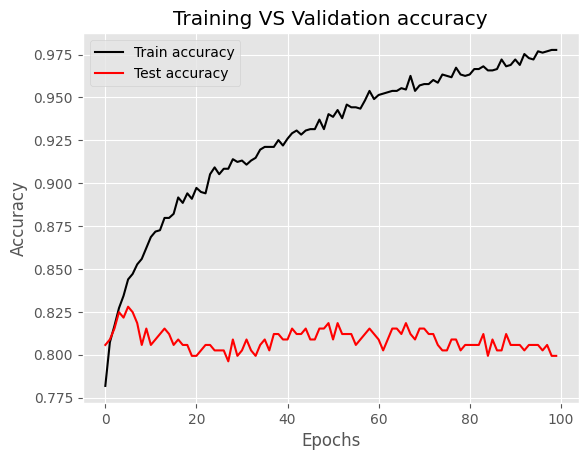

In [29]:
import matplotlib.pylab as plt
#ggplot = gramer of graphics
plt.style.use('ggplot')
plt.plot(np.arange(0,100), hist.history['accuracy'], label = 'Train accuracy', color = 'black')
plt.plot(np.arange(0,100), hist.history['val_accuracy'], label = 'Test accuracy', color = 'red')
plt.title("Training VS Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can see high variance between train and test accuracy, so it is overfitted.
At epochs till 10 to 14, accuracy is good. After that the variance starts.
To fix overfitting: regularisation, Batch normalisation, dropout, early stopping.

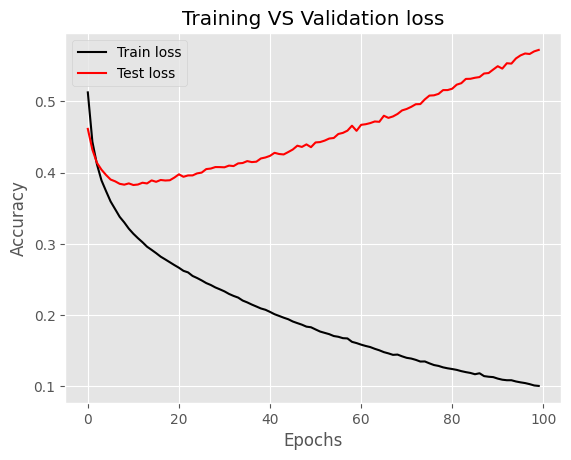

In [30]:
plt.style.use('ggplot')
plt.plot(np.arange(0,100), hist.history['loss'], label = 'Train loss', color = 'black')
plt.plot(np.arange(0,100), hist.history['val_loss'], label = 'Test loss', color = 'red')
plt.title("Training VS Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()